In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np

import utils
import os

In [2]:
#### 2020 ####
column_semantics_2020 = {
    'Investment number': 'investment_id',
    'This investment belongs to project number…': 'project_id',
    'Commissioning Year': 'commissioning_year',
    'Status ID\n1 : Under Consideration,\n2 : In Planning but not permitting,\n3 : In permitting,\n4 : Under Construction': 'status',
    'Type of Element': 'asset_type',
    'Substation From': 'substation_1',
    'Substation To': 'substation_2',
    'Technology': 'ac_dc',
    'Total route length (km)': 'specified_length_km',
    'Description of the investment': 'description'
}

status_map_2020 = {
    1: 'under_consideration', # under consideration
    2: 'planned_not_yet_permitting', # planning, not permitting
    3: 'in_permitting', # in permitting
    4: 'under_construction'  # under construction
}
# No need to separate AC and DC as there is a separate column
# in the TYNDP data.
asset_type_map_2020 = {
    'ACTransmissionLine': 'line',
    'DCTransmissionLine': 'line',
    'OnshoreSubstation': 'substation',
    'OffshoreSubstation': 'substation',
    # 'cable' will be mapped to 'line' after adding column 'underground' of binary values.
    'OffshoreDCTransmissionCable': 'cable',
    'OffshoreACTransmissionCable': 'cable'
}

excel_2020, sheet_2020 = '2020/transmission.xlsx', 'Trans.Investments'

In [3]:
#### 2018 ####
column_semantics_2018 = {
    'Investment ID': 'investment_id',
    'ExpectedCommissioningYear': 'commissioning_year',
    'Status': 'status',
    'ElementsType': 'asset_type',
    'From': 'substation_1',
    'To': 'substation_2',
    'TechnologyType': 'ac_dc',
    'VoltageLevel (kV)': 'voltage',
    'TotalRouteLength (km)': 'specified_length_km'
}

status_map_2018 = {
    'under consideration': 1,
    'planned but not yet permitting': 2,
    'permitting': 3,
    'under construction': 4
}
asset_type_map_2018 = {
    'Overhead Line': 'line',
    'Substation': 'substation',
    'Subsea Cable': 'cable',
    'Underground Cable': 'cable'
}

excel_2018, sheet_2018 =  r'2018/TYNDP_2018_Project_List.xlsx', 'Sheet1'

In [4]:
#### 2016 ####
column_semantics_2016 = {
    'TYNDP 2016 Investment Index': 'investment_id',
    'TYNDP 2016 expected commissioning date': 'commissioning_year',
    'TYNDP 2016 status name': 'status',
    'Element type': 'asset_type',
    'From Substation name': 'substation_1',
    'To Substation name': 'substation_2',
    'AC or DC': 'ac_dc',
    'Voltage Level': 'voltage',
    'Line length [km]': 'specified_length_km'
}
# TODO: commissioned, planning, design
# TODO: rather specify rows we want to keep? E.g. via list
# TODO: map values to strings (semantics!), then choose only those that are 'in permitting' or 'under construction'
status_map_2016 = {
    'under consideration': 1,
    'Design & Permitting': 2,
    'permitting': 3,
    'under construction': 4
}
asset_type_map_2016 = {
    'Overhead Line': 'line',
    'Substation': 'substation',
    'Subsea Cable': 'cable',
    'Underground Cable': 'cable'
}

excel_2016, sheet_2016 = r'2016/TYNDP2016_Projects data.xlsx', 'Investments'

In [5]:
# wanted = tyndp_to_pypsa.prepare_tyndp_data(excel_2010, sheet_2010, column_semantics_2010, status_map_2010, header_row=2)
# wanted = tyndp_to_pypsa.prepare_tyndp_data(excel_2012, sheet_2012, column_semantics_2012, status_map_2012, header_row=4)
#wanted = tyndp_to_pypsa.prepare_tyndp_data(excel_2014, sheet_2014, column_semantics_2014, status_map_2014)
tyndp = utils.prepare_tyndp_data(excel_2020, sheet_2020, column_semantics_2020, status_map_2020, asset_type_map=asset_type_map_2020,header_row=1, base_url=r'https://tyndp2020-project-platform.azurewebsites.net/projectsheets/transmission/')
tyndp.head()

investment_id  project_id commissioning_year                      status  \
0              2           1               2024  planned_not_yet_permitting   
1              4           1               2022               in_permitting   
2            474           1               2021               in_permitting   
3             18           4               2022               in_permitting   
4            496           4               2022               in_permitting   

   asset_type                  substation_1  \
0        line                 Pedralva (PT)   
1        line  V.Minho (by Ribeira de Pena)   
2  substation          Ribeira de Pena (PT)   
3        line                   Beariz (ES)   
4        line                Fontefria (ES)   

                                     substation_2 ac_dc  specified_length_km  \
0                                    Sobrado (PT)    AC                67.00   
1                      Feira (by Ribeira de Pena)    AC               131.00   
2                                               -    AC                 0.00   
3                                  Fontefria (ES)    AC                30.00   
4  Vila Nova de Famalicão (PT) (By Ponte de Lima)    AC               140.21   

                                         description  underground  \
0  New double circuit Pedralva (PT) - Sobrado (PT...        False   
1  New double-circuit 400kV OHL Vieira do Minho (...        False   
2        New 400/60kV substation in Ribeira de Pena.        False   
3  New northern interconnection. New double circu...        False   
4  New northern interconnection. New 400kV OHL Fo...        False   

   voltage (guess)                                                url  
0            400.0  https://tyndp2020-project-platform.azurewebsit...  
1            400.0  https://tyndp2020-project-platform.azurewebsit...  
2              NaN  https://tyndp2020-project-platform.azurewebsit...  
3            400.0  https://tyndp2020-project-platform.azurewebsit...  
4            400.0  https://tyndp2020-project-platform.azurewebsit...

In [6]:
# tyndp.commissioning_year = utils.commissioning_dates_to_year(tyndp.commissioning_year)
tyndp['x1'], tyndp['y1'], tyndp['x2'], tyndp['y2'] = np.NAN, np.NAN, np.NAN, np.NAN

In [16]:
f = '2020/2020_curated.csv'

if not os.path.exists(f):
    tyndp.to_csv(f)

In [8]:
# read in newest buses.csv
buses = (pd.read_csv('buses.csv', quotechar="'",
                     true_values='t', false_values='f',
                     dtype=dict(bus_id="str"))
         .set_index("bus_id")
         .drop(['station_id'], axis=1)
         .rename(columns=dict(voltage='v_nom')))
buses = buses.query('symbol == "Substation"')

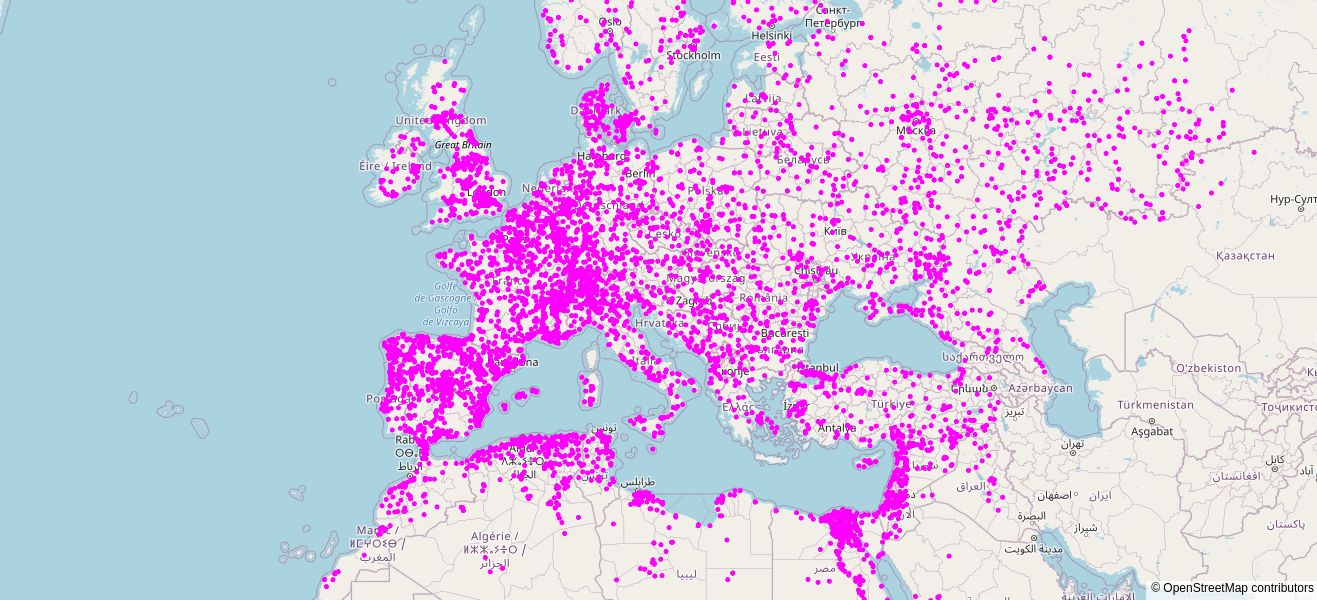

In [9]:
# TODO: maybe add option to plot pypsa-eur lines with switch (-> check whether line exists / is placed wrongly)

import plotly.express as px

fig = px.scatter_mapbox(buses, lat="y", lon="x", color_discrete_sequence=["fuchsia"], zoom=3, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [ ]:
# consecutive coordinates are interpreted as start and endpoints?
lats = [48, 50] 
lons = [10, 12]
fig = px.line_geo(lat=lats, lon=lons)# , color=3*['fuchsia'])
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Add MW column to 'curated' file

In [18]:
df = pd.read_csv(r'2020/2020_curated.csv')

In [19]:
df['p_nom_max'] = np.NAN

In [ ]:
cols = df.columns.tolist()
cols

In [21]:
cols = ['Unnamed: 0',
 'investment_id',
 'project_id',
 'commissioning_year',
 'status',
 'asset_type',
 'substation_1',
 'substation_2',
 'ac_dc',
 'specified_length_km',
 'description',
 'underground',
 'voltage (guess)',
 'p_nom_max',
 'url',
 'x1',
 'y1',
 'x2',
 'y2']
 
df = df[cols]

In [17]:
df.to_csv(r'2020/2020_curated.csv', index=False)

# Check integrity of substation coordinates, extract substations from curated tyndp file

In [7]:
df = pd.read_csv(r'2020/2020_curated.csv')

In [8]:
buses_1 = df.loc[:,('substation_1','x1','y1')]
buses_1.columns = ['substation','x','y']

buses_2 = df.loc[:,('substation_2','x2','y2')]
buses_2.columns = ['substation','x','y']

buses = pd.concat([buses_1, buses_2])
buses = buses.drop_duplicates()

# check if there are substations with same name but different coordinates
# index of duplicates (includes all occurrences)
duplicates = buses.duplicated(subset=['substation'], keep=False)
print('If not empty, this shows all substations with multiple different coordinate values:')
buses.loc[duplicates,:].sort_values('substation') 

If not empty, this shows all substations with multiple different coordinate values:


substation          x          y
111  Bajina Basta (RS)        NaN        NaN
113  Bajina Basta (RS)  19.500315  43.953021
308     Nea Santa (GR)        NaN        NaN
61      Nea Santa (GR)  22.920411  40.842266
111      Visegrad (BA)        NaN        NaN
117      Visegrad (BA)  19.281624  43.792139